# Comparing tripduration 

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import sys

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
##Function to download and unpack Citibike data.
##Moves the data to the directory pointed to by $PUIDATA

#check if the env variable PUIDATA exists
if os.getenv("PUIDATA") is None:
    print ("must set PUIDATA env variable")
    sys.exit()


def getCitiBikeCSV(datestring):
    
    '''Downloads citibike data and unzips it. If the data is downloaded by not unzippeds it zips it. 
        Moves the data to $PUIDATA. Arguments: date string as yyyymm
    '''
    
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")

        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                    "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201506'        
getCitiBikeCSV(datestring)

('Downloading', '201506')
file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [6]:
df['ageS'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]
df['ageC'] = 2015 - df['birth year'][(df['usertype'] == 'Customer')]
df['age'] = 2015 - df['birth year']
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageS,ageC,age
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,31.0,NaN,31.0
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,18.0,NaN,18.0
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,22.0,NaN,22.0
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,34.0,NaN,34.0
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,NaN,NaN,NaN


In [95]:
df['tripduration_min'] = df['tripduration']/60
df1 = df.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'birth year'],axis = 1)
df1.head()

,tripduration,usertype,gender,ageS,ageC,age,tripduration_min
0,1338,Subscriber,1,31.0,NaN,31.0,22.300000
1,290,Subscriber,1,18.0,NaN,18.0,4.833333
2,634,Subscriber,1,22.0,NaN,22.0,10.566667
3,159,Subscriber,1,34.0,NaN,34.0,2.650000
4,1233,Customer,0,NaN,NaN,NaN,20.550000


In [96]:
df1['tripduration_min'] = df1['tripduration']/60

In [97]:
df1 = df1[df1.gender != 0]
df1.gender.replace(to_replace=1, value = 'Male', inplace = True)
df1.gender.replace(to_replace=2, value = 'Female', inplace = True)

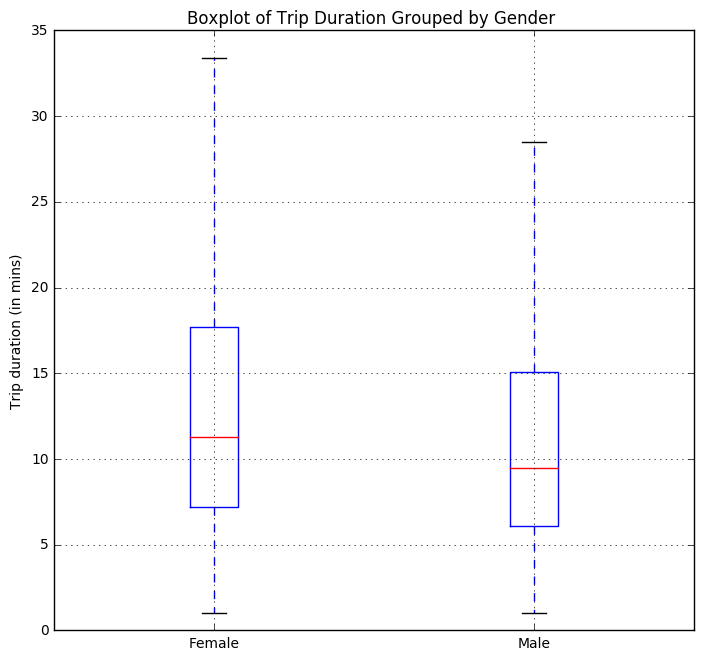

In [98]:
df1.boxplot(column='tripduration_min', by = 'gender', sym = '', figsize=(8,8))
pl.title("Boxplot of Trip Duration Grouped by Gender ")
pl.ylabel('Trip duration (in mins)')
pl.xlabel("")
pl.suptitle("")

##      Figure 1: Boxplot of Tripduration of CitiBike riders grouped by gender.

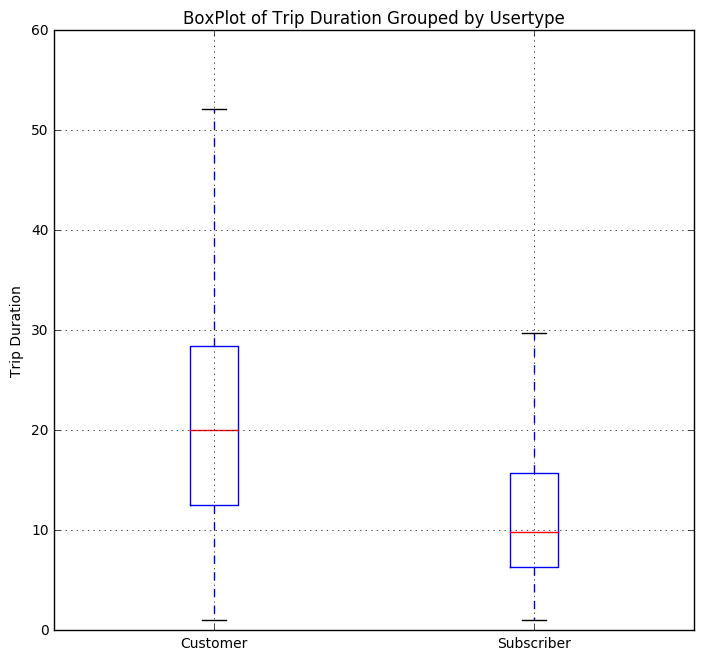

In [99]:
df.boxplot(column='tripduration_min', by = 'usertype', sym = '', figsize=(8,8))
pl.title("BoxPlot of Trip Duration Grouped by Usertype")
pl.ylabel('Trip Duration')
pl.xlabel("")
pl.suptitle("")

##      Figure 2: Boxplot of Trip duration of CitiBike riders grouped by usertype.

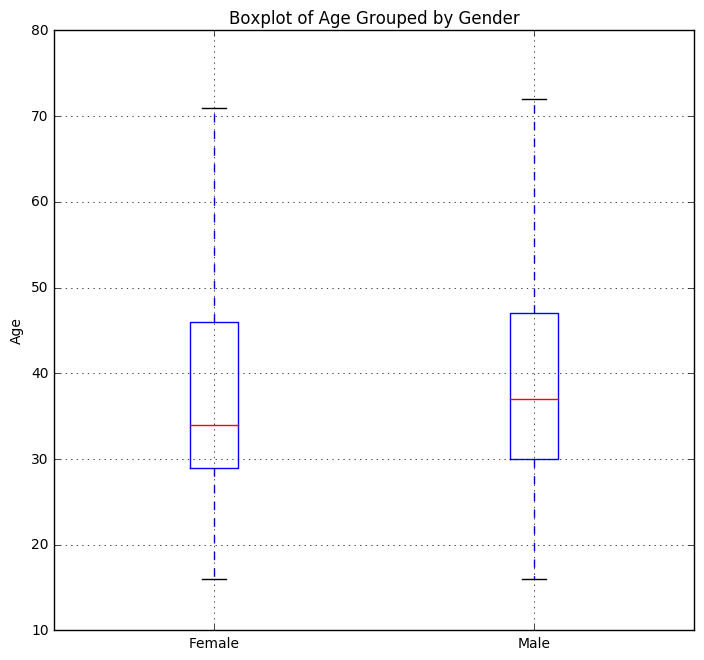

In [100]:
df1.boxplot(column='age', by = 'gender', sym = "", figsize=(8,8))
# pl.ylim(0,100)
pl.title("Boxplot of Age Grouped by Gender")
pl.ylabel('Age')
pl.xlabel("")
pl.suptitle("")

##      Figure 3: Boxplot of Age of CitiBike riders grouped by gender.